<a href="https://colab.research.google.com/github/KillerStrike17/10DaysofMLChallenge/blob/master/Day6/Day6_Fashion_MNIST_using_Custom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day6

## Importing the Libraries


In [1]:
!nvidia-smi

Mon Mar 30 00:44:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#I summon Tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint


## Data Load and Extract

In [3]:
#splitting the database
(train_features, train_labels), (test_features, test_labels) = fashion_mnist.load_data()
#Storing the training dataset details in variables
print(train_features.shape)


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
num_train, img_rows, img_cols =  train_features.shape
print("No of training dataset:- ",num_train)
print("No of rows:- ",img_rows)
print("No of columns:- ",img_cols)
# print("No of channels:- ",img_channels)
#Storing the testing dataset details in variables
num_test, _, _ =  test_features.shape
#Storing the total class of dataset in num_classes variable
num_classes = len(np.unique(train_labels))
print("Total Classes:- ", num_classes)

No of training dataset:-  60000
No of rows:-  28
No of columns:-  28
Total Classes:-  10


## Data Visualization

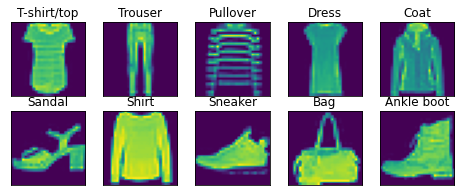

In [5]:
#class_names of the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneakeclass_namesr', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(8,3))
#loop to display a sample image of each channel
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data Transformation

In [0]:
#reshaping the training and testing images,
#representing the images in 3 Dimension.
train_features = train_features.reshape(train_features.shape[0], 28, 28,1)
test_features = test_features.reshape(test_features.shape[0], 28, 28,1)

In [7]:
print(train_features.shape)

(60000, 28, 28, 1)


In [0]:
#chaning the training and testing image datatype
#to float
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')
#The data contains pixel values ranging
#from 0-255, hence dividing all value by 255
#so that the data comes in range of 0-1
train_features /= 255
test_features /= 255

In [0]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

## Model Building

In [0]:
# One Cycle LR Implementation
def lr_schedule():
    
    def schedule(epoch):

      lr=lr1=np.interp([epoch],[0, 5,24], [0.0025, 0.005, 0])[0]
      print('epoch ', epoch+1, ': setting learning rate to ',lr1)
      return lr
    
    return LearningRateScheduler(schedule)

lr_sched = lr_schedule()

In [88]:
model = Sequential()

 
model.add(Convolution2D(filters = 32,kernel_size=( 3, 3), activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(filters = 64, kernel_size=( 3, 3), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(filters = 128, kernel_size=( 3, 3), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Convolution2D(filters =256, kernel_size=( 3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(filters = 32, kernel_size = (1, 1), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.10))


model.add(Convolution2D(filters = 64, kernel_size = (3, 3), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Convolution2D(filters = 128,kernel_size =(3, 3), activation='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Convolution2D(filters =256, kernel_size=( 3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, activation='relu')) 
# Layer 8(22x22,10,7)
model.add(Convolution2D(10, 6))
# # Layer 9(24x24,10,1)
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 26, 26, 64)        18496     
_________________________________________________________________
batch_normalization_91 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
dropout_91 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 26, 26, 128)       73856     
_________________________________________________________________
batch_normalization_92 (Batc (None, 26, 26, 128)       512       
_________________________________________________________________
dropout_92 (Dropout)         (None, 26, 26, 128)     

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.003,momentum=0.90), metrics=['accuracy'])

In [90]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip= True,rotation_range=3)
datagen.fit(train_features)

# datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
validation_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

# datagen.fit(train_features)
validation_datagen.fit(train_features)

train_iterator = datagen.flow(train_features, train_labels, batch_size=256,shuffle=True)
validation_iterator = validation_datagen.flow(test_features, test_labels, batch_size=256,shuffle=True)

checkpoint = ModelCheckpoint('weights-improvement-cutouts-{epoch:02d}-{val_acc:.2f}.hdf5', save_best_only=True, monitor='val_acc', mode='max')
# Train the model
model_info = model.fit_generator(train_iterator,
                      steps_per_epoch=len(train_iterator), 
                      validation_data = validation_iterator, 
                      validation_steps = len(validation_iterator),
                      epochs=24, verbose=1,
                      callbacks = [lr_sched])

epoch  1 : setting learning rate to  0.0025
Epoch 1/24
235/235 [==============================] - 30s 130ms/step - loss: 0.6763 - accuracy: 0.7593 - val_loss: 1.6770 - val_accuracy: 0.3073 - lr: 0.0025
epoch  2 : setting learning rate to  0.003
Epoch 2/24
235/235 [==============================] - 30s 126ms/step - loss: 0.3970 - accuracy: 0.8546 - val_loss: 0.4617 - val_accuracy: 0.8355 - lr: 0.0030
epoch  3 : setting learning rate to  0.0035
Epoch 3/24
235/235 [==============================] - 30s 127ms/step - loss: 0.3416 - accuracy: 0.8774 - val_loss: 0.3547 - val_accuracy: 0.8705 - lr: 0.0035
epoch  4 : setting learning rate to  0.004
Epoch 4/24
235/235 [==============================] - 30s 127ms/step - loss: 0.3065 - accuracy: 0.8891 - val_loss: 0.3186 - val_accuracy: 0.8843 - lr: 0.0040
epoch  5 : setting learning rate to  0.0045000000000000005
Epoch 5/24
235/235 [==============================] - 30s 126ms/step - loss: 0.2887 - accuracy: 0.8968 - val_loss: 0.2998 - val_accurac

In [0]:
#function to plot graphs of accuracy and loss
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


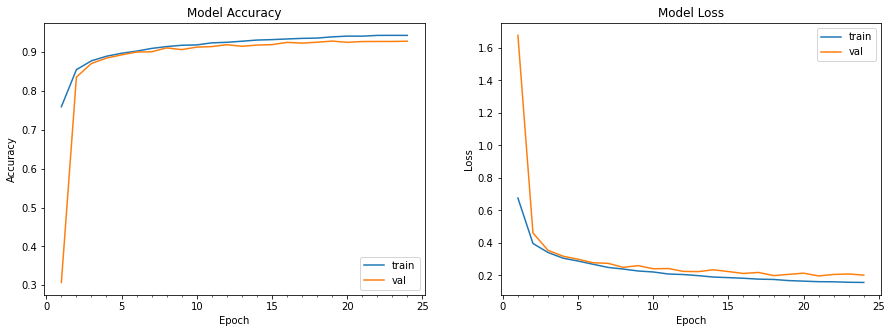

In [94]:
plot_model_history(model_info)